# Backpropagation

chain rule:

dz/dx = dz/dy * dy/dx

x * y -> z -->Loss

back propagate: dLoss/dz

* forward pass: compute loss
* compute local gradients
* backward pass: compute dLoss/dWeights using chain rule


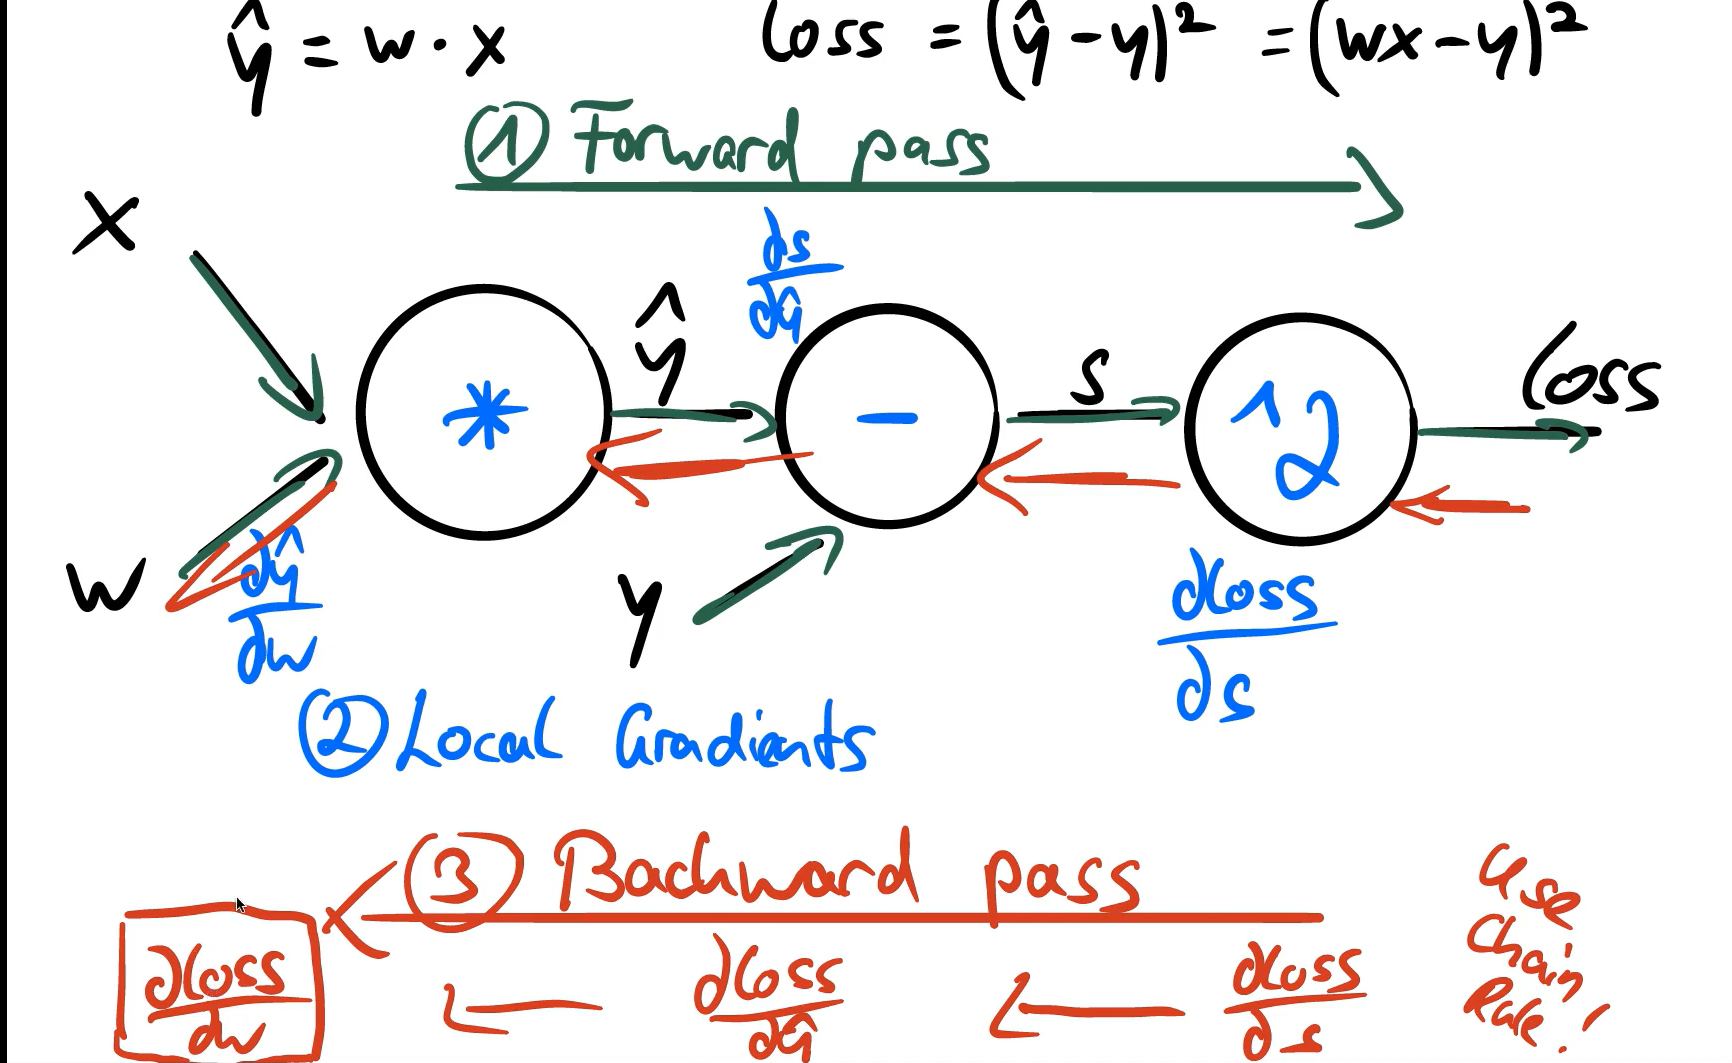

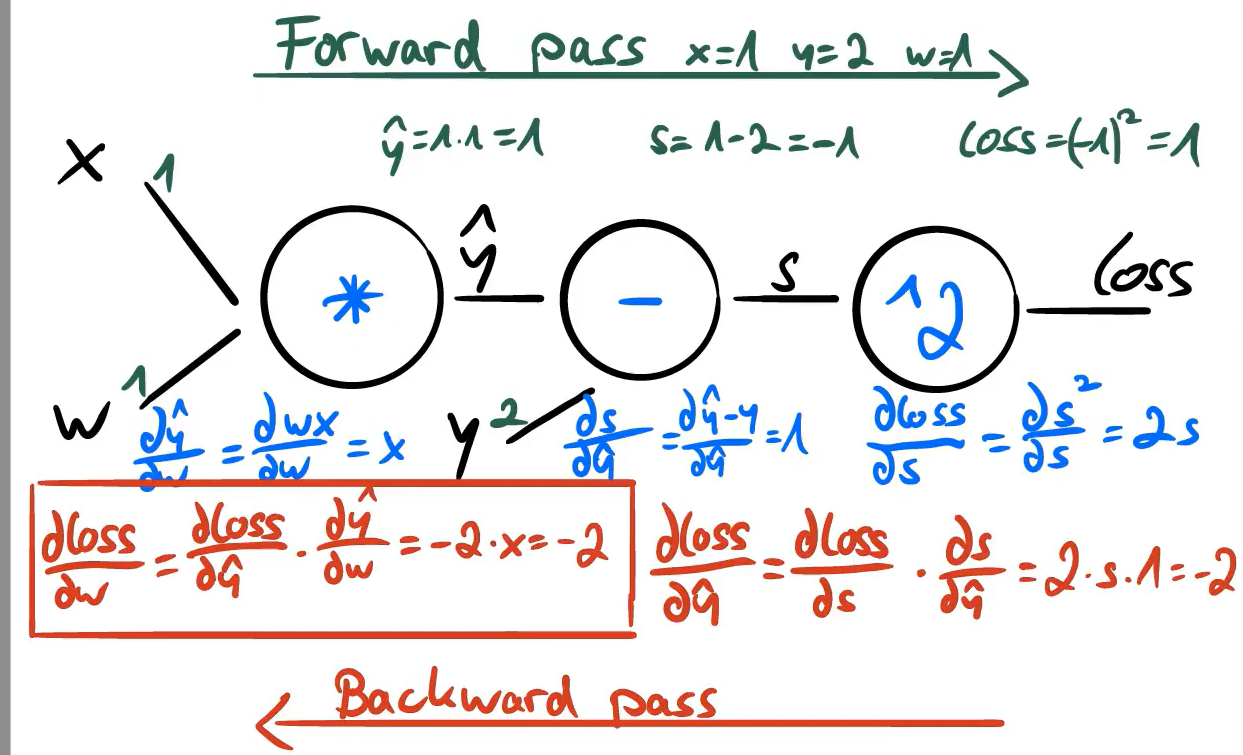

In [ ]:
import torch

x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad=True)

# forward pass
y_hat = x * w 
loss = (y_hat - y)**2

print(loss)

# backward pass
loss.backward()
print(w.grad)

# update weights
# next forward and backwards




tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


##### Building Linear Regression from scrach with numpy

* prediction           - manullay
* Gradient Computaiton - manullay
* Loss Computation     - manullay
* prameters Updates    - manullay



In [ ]:
import numpy as np

# f = w * x
# f = 2 * x

X = np.array([1,2,3,4], dtype=np.float32)
Y = np.array([2,4,6,8], dtype=np.float32)

w = 0.0

# model prediction
def forward(x):
    return w * x

# loss = MSE
# MSE = 1/N * (w*x - y)**2
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

# gradient
# dJ/dw = 1/N 2x (w*x - y)d
def gradient(x,y, y_pred):
    return np.dot(2*x, y_pred-y).mean()

# prediction with the initial parameters of the network i.e w =0, therfore: ans:0
print(f'Prediction before training: f(5)= {forward(5):.3f}')

# Training

learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):

    #forward()
    y_pred = forward(X)

    #loss()
    l = loss(Y, y_pred)

    #gradient()
    dw = gradient(X,Y, y_pred)

    # update weights (back propagation)
    w -= learning_rate * dw

    if epoch % 2 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5)= {forward(5):.3f}')



Prediction before training: f(5)= 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 3: w = 1.872, loss = 0.76800019
epoch 5: w = 1.980, loss = 0.01966083
epoch 7: w = 1.997, loss = 0.00050332
epoch 9: w = 1.999, loss = 0.00001288
epoch 11: w = 2.000, loss = 0.00000033
epoch 13: w = 2.000, loss = 0.00000001
epoch 15: w = 2.000, loss = 0.00000000
epoch 17: w = 2.000, loss = 0.00000000
epoch 19: w = 2.000, loss = 0.00000000
Prediction after training: f(5)= 10.000


#### Traing Linear model with torch

* prediction           - manullay
* Gradient Computaiton - Autograd
* Loss Computation     - manullay
* prameters Updates    - manullay


In [ ]:
import torch

# f = w * x
# f = 2 * x

X = torch.tensor([1,2,3,4], dtype=torch.float32)
Y = torch.tensor([2,4,6,8], dtype=torch.float32)

w = torch.tensor(0.0, requires_grad=True)

# model prediction
def forward(x):
    return w * x

# loss = MSE
# MSE = 1/N * (w*x - y)**2
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

# gradient


# prediction with the initial parameters of the network i.e w =0, therfore: ans:0
print(f'Prediction before training: f(5)= {forward(5):.3f}')

# Training

learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):

    #forward()
    y_pred = forward(X)

    #loss()
    l = loss(Y, y_pred)

    #gradient = backward pass
    l.backward() #dl/dw gets all gradient points of the graph

    # update weights (back propagation)
    with torch.no_grad():
        w -= learning_rate * w.grad


    # zero gradinet -> make sure that gradients should be zero after the backpropagation, that shoudn't carry to the next iteration.
    w.grad.zero_()

    if epoch % 10 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5)= {forward(5):.3f}')



Prediction before training: f(5)= 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction after training: f(5)= 10.000


* prediction           - manullay
* Gradient Computaiton - Autograd
* Loss Computation     - Pytorch Loss
* prameters Updates    - Pytorch Optimizer


1) Design model (input, output size, forward pass)
2) Construct loss and optimizer
3) Training loop
 * forward pass : compute predictions
 * backward pass: gets the gradients 
 * update weights

In [20]:
import torch 
import torch.nn as nn

# f = w * x
# f = 2 * x

X = torch.tensor([1,2,3,4], dtype=torch.float32)
Y = torch.tensor([2,4,6,8], dtype=torch.float32)

w = torch.tensor(0.0, requires_grad=True)

# model prediction
def forward(x):
    return w * x


# gradient


# prediction with the initial parameters of the network i.e w =0, therfore: ans:0
print(f'Prediction before training: f(5)= {forward(5):.3f}')

# Training

learning_rate = 0.01
n_iters = 50

loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr=learning_rate)

for epoch in range(n_iters):

    # prediction = forward()
    y_pred = forward(X)

    #loss()
    l = loss(Y, y_pred)

    #gradient = backward pass
    l.backward() #dl/dw gets all gradient points of the graph

    # update weights (back propagation)
    optimizer.step()


    # zero gradinet -> make sure that gradients should be zero after the backpropagation, that shoudn't carry to the next iteration.
    optimizer.zero_grad()

    if epoch % 2 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5)= {forward(5):.3f}')



Prediction before training: f(5)= 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 3: w = 0.772, loss = 15.66018772
epoch 5: w = 1.113, loss = 8.17471695
epoch 7: w = 1.359, loss = 4.26725292
epoch 9: w = 1.537, loss = 2.22753215
epoch 11: w = 1.665, loss = 1.16278565
epoch 13: w = 1.758, loss = 0.60698116
epoch 15: w = 1.825, loss = 0.31684780
epoch 17: w = 1.874, loss = 0.16539653
epoch 19: w = 1.909, loss = 0.08633806
epoch 21: w = 1.934, loss = 0.04506890
epoch 23: w = 1.952, loss = 0.02352631
epoch 25: w = 1.966, loss = 0.01228084
epoch 27: w = 1.975, loss = 0.00641066
epoch 29: w = 1.982, loss = 0.00334642
epoch 31: w = 1.987, loss = 0.00174685
epoch 33: w = 1.991, loss = 0.00091188
epoch 35: w = 1.993, loss = 0.00047601
epoch 37: w = 1.995, loss = 0.00024848
epoch 39: w = 1.996, loss = 0.00012971
epoch 41: w = 1.997, loss = 0.00006770
epoch 43: w = 1.998, loss = 0.00003534
epoch 45: w = 1.999, loss = 0.00001845
epoch 47: w = 1.999, loss = 0.00000963
epoch 49: w = 1.999, loss =

* prediction           - Pytorch model
* Gradient Computaiton - Autograd
* Loss Computation     - Pytorch Loss
* prameters Updates    - Pytorch Optimizer


In [39]:
import torch 
import torch.nn as nn

# f = w * x
# f = 2 * x

X = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)

X_text = torch.tensor([5], dtype=torch.float32)

n_smaple, n_features = X.shape
print(n_smaple, n_features)

input_size = n_features
output_size = n_features

model = nn.Linear(input_size, output_size)

# prediction with the initial parameters of the network i.e w =0, therfore: ans:0
print(f'Prediction before training: f(5)= {model(X_text).item():.3f}')

# Training

learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):

    # prediction = forward()
    y_pred = model(X)

    #loss()
    l = loss(Y, y_pred)

    #gradient = backward pass
    l.backward() #dl/dw gets all gradient points of the graph

    # update weights (back propagation)
    optimizer.step()


    # zero gradinet -> make sure that gradients should be zero after the backpropagation, that shoudn't carry to the next iteration.
    optimizer.zero_grad()

    if epoch % 10 == 0:
        #unpack the optim values
        [w, b] = model.parameters()
        print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5)= {model(X_text).item():.3f}')



4 1
Prediction before training: f(5)= 1.993
epoch 1: w = 0.706, loss = 20.24533653
epoch 11: w = 1.738, loss = 0.52958953
epoch 21: w = 1.906, loss = 0.01915863
epoch 31: w = 1.935, loss = 0.00563503
epoch 41: w = 1.941, loss = 0.00498599
epoch 51: w = 1.943, loss = 0.00468747
epoch 61: w = 1.945, loss = 0.00441442
epoch 71: w = 1.946, loss = 0.00415748
epoch 81: w = 1.948, loss = 0.00391548
epoch 91: w = 1.950, loss = 0.00368757
Prediction after training: f(5)= 9.899


### Custom Class

In [40]:
import torch 
import torch.nn as nn

# f = w * x
# f = 2 * x

X = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)

X_text = torch.tensor([5], dtype=torch.float32)

n_smaple, n_features = X.shape
print(n_smaple, n_features)

input_size = n_features
output_size = n_features

# model = nn.Linear(input_size, output_size)

class LinearRegression(nn.Module):

    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()

        #define layer
        self.lin = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.lin(x)
    

model = LinearRegression(input_size, output_size)


# prediction with the initial parameters of the network i.e w =0, therfore: ans:0
print(f'Prediction before training: f(5)= {model(X_text).item():.3f}')

# Training

learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):

    # prediction = forward()
    y_pred = model(X)

    #loss()
    l = loss(Y, y_pred)

    #gradient = backward pass
    l.backward() #dl/dw gets all gradient points of the graph

    # update weights (back propagation)
    optimizer.step()


    # zero gradinet -> make sure that gradients should be zero after the backpropagation, that shoudn't carry to the next iteration.
    optimizer.zero_grad()

    if epoch % 10 == 0:
        #unpack the optim values
        [w, b] = model.parameters()
        print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5)= {model(X_text).item():.3f}')



4 1
Prediction before training: f(5)= 2.055
epoch 1: w = 0.657, loss = 19.04765320
epoch 11: w = 1.660, loss = 0.52384496
epoch 21: w = 1.825, loss = 0.04278347
epoch 31: w = 1.855, loss = 0.02863589
epoch 41: w = 1.864, loss = 0.02666751
epoch 51: w = 1.868, loss = 0.02510754
epoch 61: w = 1.872, loss = 0.02364593
epoch 71: w = 1.876, loss = 0.02226963
epoch 81: w = 1.880, loss = 0.02097341
epoch 91: w = 1.883, loss = 0.01975263
Prediction after training: f(5)= 9.766
